In [1]:
import scanpy as sc

In [2]:
adata = sc.read_h5ad('lung.h5ad')  # lung single cell data from single cell portal

In [3]:
adata

AnnData object with n_obs × n_vars = 106792 × 30983
    obs: 'n_genes', 'n_UMI', 'percent_mito', 'method', 'doublet', 'predicted_celltype', 'compartment', 'Cluster', 'SubCluster', 'Viral+', 'leiden_res_2', 'leiden_res_1.3', 'donor', 'disease'
    var: 'featureid'
    uns: 'Cluster_colors', 'Nuc-Cell_colors', 'SubCluster_colors', 'W_harmony', 'genome', 'harmony_knn_distances', 'harmony_knn_indices', 'manual_coarse_annotation_colors', 'method_colors', 'modality', 'neighbors', 'pca', 'predictions_colors', 'sample_colors', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'sig_background'
    varm: 'PCs', 'de_res'
    layers: 'counts', 'winsorized'

In [4]:
# 106792 cells and 30983 genes

In [5]:
adata.obs

,n_genes,n_UMI,percent_mito,method,doublet,predicted_celltype,compartment,Cluster,SubCluster,Viral+,leiden_res_2,leiden_res_1.3,donor,disease
barcodekey,,,,,,,,,,,,,,
02-P005175-S053-R01-GTTTGGAGTATCAAGA,2302,3874,1.445534,nuclei,False,lymphatic endothelial,endothelial,Endothelial,Lymphatic EC,False,24,15,D1,COVID-19
02-P005175-S053-R01-TGCAGTAAGCAGATAT,2286,3726,0.053677,nuclei,False,lymphatic endothelial,endothelial,Endothelial,Lymphatic EC,False,24,15,D1,COVID-19
02-P005175-S053-R01-CCCTAACCACTACCGG,1799,2904,0.068871,nuclei,False,lymphatic endothelial,endothelial,Endothelial,Lymphatic EC,False,24,15,D1,COVID-19
02-P005175-S053-R01-TCCGAAAAGGTATCTC,1276,1925,0.103896,nuclei,False,lymphatic endothelial,endothelial,Endothelial,Lymphatic EC,False,24,15,D1,COVID-19
02-P005175-S053-R01-TGCACGGTCTCGGCTT,1147,1742,0.229621,nuclei,False,lymphatic endothelial,endothelial,Endothelial,Lymphatic EC,False,24,15,D1,COVID-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
04-P006354-S057-R02-AGGTCCGGTGATGATA,300,401,0.249377,cryo,False,NaN,nan,Endothelial,Capillary Aerocytes,False,4,8,D8_3,COVID-19
04-P006354-S057-R02-CTCTACGCAGATCTGT,312,412,0.000000,cryo,False,NaN,nan,Endothelial,Lymphatic EC,False,24,15,D8_3,COVID-19
04-P006354-S057-R02-TGACAACTCTCGATGA,298,400,4.250000,cryo,False,NaN,nan,T+NK,Doublets CD4 T/ CD8 T/ NK cells,False,1,5,D8_3,COVID-19


In [6]:
#Step-1: Filtering (removing cells with fewer than 200 genes detected and genes that are found in fewer than 3 cells, to remove low quality cells)

In [7]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [8]:
adata

AnnData object with n_obs × n_vars = 106792 × 29455
    obs: 'n_genes', 'n_UMI', 'percent_mito', 'method', 'doublet', 'predicted_celltype', 'compartment', 'Cluster', 'SubCluster', 'Viral+', 'leiden_res_2', 'leiden_res_1.3', 'donor', 'disease'
    var: 'featureid', 'n_cells'
    uns: 'Nuc-Cell_colors', 'SubCluster_colors', 'W_harmony', 'genome', 'harmony_knn_distances', 'harmony_knn_indices', 'manual_coarse_annotation_colors', 'method_colors', 'modality', 'neighbors', 'pca', 'predictions_colors', 'sample_colors', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'sig_background'
    varm: 'PCs', 'de_res'
    layers: 'counts', 'winsorized'

In [9]:
# check what is the max and min percent_mito. Increased levels of mitochondrial transcipts indicates unhealthy cells, maybe broken cells. This may add noise hence a threshold must be set to remove such cells.

In [10]:
adata.obs.percent_mito.max()

19.989696032972695

In [11]:
adata.obs.percent_mito.min()

0.0

In [12]:
adata = adata[adata.obs['percent_mito'] < 10, :]

In [13]:
adata

View of AnnData object with n_obs × n_vars = 101731 × 29455
    obs: 'n_genes', 'n_UMI', 'percent_mito', 'method', 'doublet', 'predicted_celltype', 'compartment', 'Cluster', 'SubCluster', 'Viral+', 'leiden_res_2', 'leiden_res_1.3', 'donor', 'disease'
    var: 'featureid', 'n_cells'
    uns: 'Nuc-Cell_colors', 'SubCluster_colors', 'W_harmony', 'genome', 'harmony_knn_distances', 'harmony_knn_indices', 'manual_coarse_annotation_colors', 'method_colors', 'modality', 'neighbors', 'pca', 'predictions_colors', 'sample_colors', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'sig_background'
    varm: 'PCs', 'de_res'
    layers: 'counts', 'winsorized'

In [14]:
adata.obs

,n_genes,n_UMI,percent_mito,method,doublet,predicted_celltype,compartment,Cluster,SubCluster,Viral+,leiden_res_2,leiden_res_1.3,donor,disease
barcodekey,,,,,,,,,,,,,,
02-P005175-S053-R01-GTTTGGAGTATCAAGA,2302,3874,1.445534,nuclei,False,lymphatic endothelial,endothelial,Endothelial,Lymphatic EC,False,24,15,D1,COVID-19
02-P005175-S053-R01-TGCAGTAAGCAGATAT,2286,3726,0.053677,nuclei,False,lymphatic endothelial,endothelial,Endothelial,Lymphatic EC,False,24,15,D1,COVID-19
02-P005175-S053-R01-CCCTAACCACTACCGG,1799,2904,0.068871,nuclei,False,lymphatic endothelial,endothelial,Endothelial,Lymphatic EC,False,24,15,D1,COVID-19
02-P005175-S053-R01-TCCGAAAAGGTATCTC,1276,1925,0.103896,nuclei,False,lymphatic endothelial,endothelial,Endothelial,Lymphatic EC,False,24,15,D1,COVID-19
02-P005175-S053-R01-TGCACGGTCTCGGCTT,1147,1742,0.229621,nuclei,False,lymphatic endothelial,endothelial,Endothelial,Lymphatic EC,False,24,15,D1,COVID-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
04-P006354-S057-R02-AGGTCCGGTGATGATA,300,401,0.249377,cryo,False,NaN,nan,Endothelial,Capillary Aerocytes,False,4,8,D8_3,COVID-19
04-P006354-S057-R02-CTCTACGCAGATCTGT,312,412,0.000000,cryo,False,NaN,nan,Endothelial,Lymphatic EC,False,24,15,D8_3,COVID-19
04-P006354-S057-R02-TGACAACTCTCGATGA,298,400,4.250000,cryo,False,NaN,nan,T+NK,Doublets CD4 T/ CD8 T/ NK cells,False,1,5,D8_3,COVID-19


In [15]:
# normalize the data
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

C:\Users\User\anaconda3\Lib\site-packages\scanpy\preprocessing\_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [16]:
# Identify highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]

In [17]:
# scaling
sc.pp.scale(adata, max_value=10)

C:\Users\User\anaconda3\Lib\site-packages\scanpy\preprocessing\_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [18]:
sc.tl.pca(adata, svd_solver='arpack')

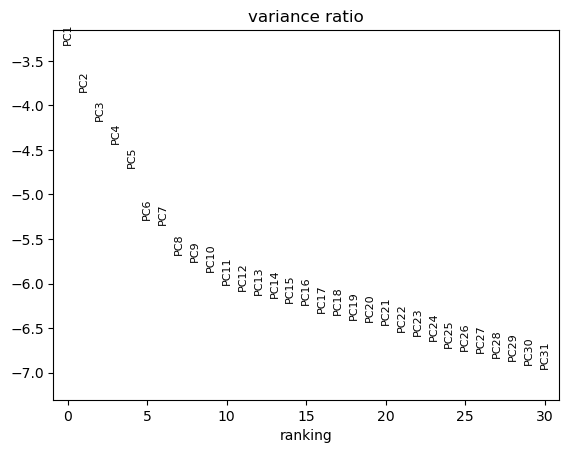

In [19]:
sc.pl.pca_variance_ratio(adata, log=True)

In [20]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=25)

In [21]:
sc.tl.umap(adata)

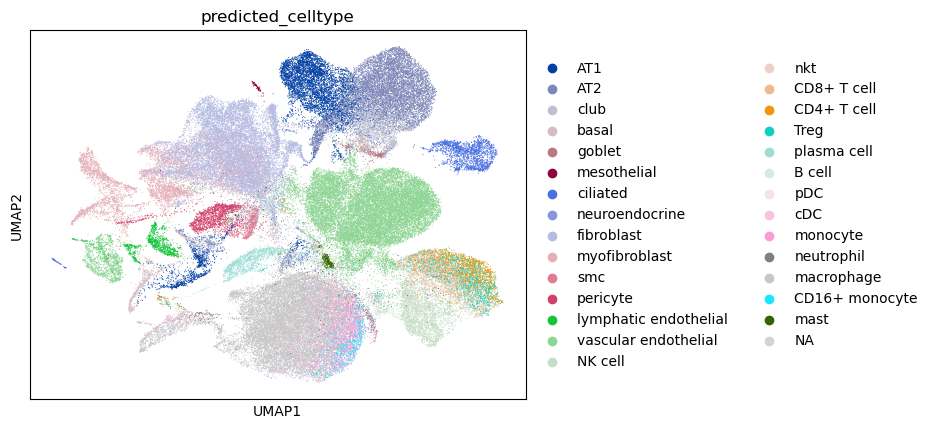

In [22]:
sc.pl.umap(
    adata,
    color="predicted_celltype",
    # Setting a smaller point size to get prevent overlap
    size=2,
)

In [24]:
print(adata.obs['leiden_res_1.3'].tail())

barcodekey
04-P006354-S057-R02-AGGTCCGGTGATGATA     8
04-P006354-S057-R02-CTCTACGCAGATCTGT    15
04-P006354-S057-R02-TGACAACTCTCGATGA     5
04-P006354-S057-R02-CATGCCTTCGGATGGA     3
04-P006354-S057-R02-CGTCACTCATTCTTAC     3
Name: leiden_res_1.3, dtype: category
Categories (20, object): ['1', '2', '3', '4', ..., '17', '18', '19', '20']


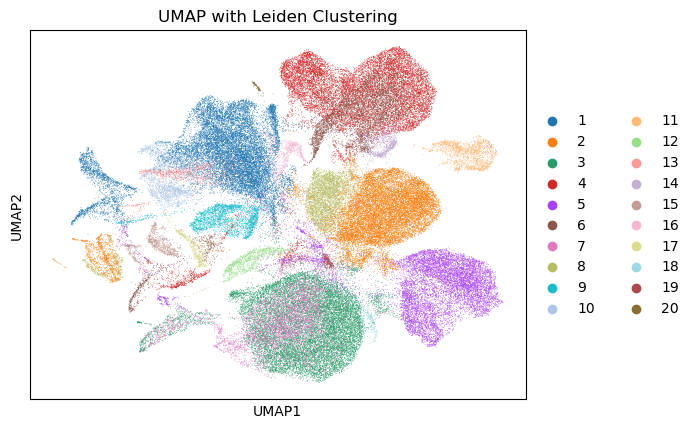

In [25]:
sc.pl.umap(adata, color='leiden_res_1.3', title='UMAP with Leiden Clustering')

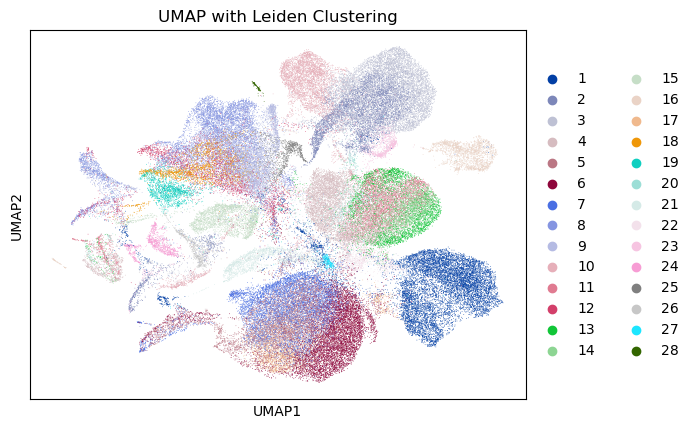

In [26]:
sc.pl.umap(adata, color='leiden_res_2', title='UMAP with Leiden Clustering')